# Import

In [1]:
import torch
import torchvision

from glcic.networks.completion_network import CompletionNetwork
from glcic.utils import postprocess

In [2]:
# load the dataset
train_dataset_dir = '../data/train/'
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_dir, transform=torchvision.transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=False)

# first batch
batch = next(iter(train_dataloader))[0]

In [3]:
# apply the mask
from glcic.utils import *

lm,em = generate_mask(4)
replacement_val = torch.rand(3)
masked_batch = apply_mask(batch,em,replacement_val)

In [8]:
# completion network
cn = CompletionNetwork()
cn.load('../logs/models/cn_scrapped_weights')
cn.eval()
_em = em[:,None,:,:]
with torch.no_grad():
    completed = cn(torch.cat((masked_batch,_em),dim=1))
completed = torch.where(_em,completed,masked_batch)
postprocessed = postprocess(completed,em,lm)

Load: load_state dict from ../logs/models/cn_scrapped_weights


Text(0.5, 1.0, 'Post-processed')

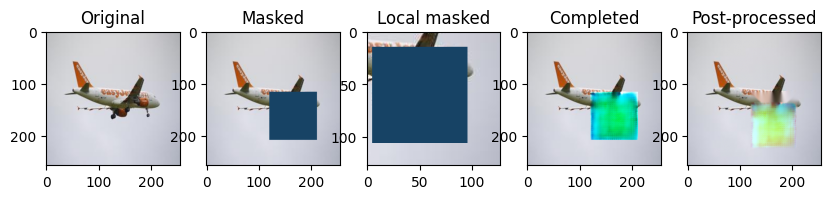

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10, 15))

# display the original image
axes[0].imshow(batch[0].permute(1,2,0))
axes[0].set_title('Original')

# display the masked image
axes[1].imshow(masked_batch[0].permute(1,2,0))
axes[1].set_title('Masked')

# display the local masked image
h,h2,w,w2 = lm[0]
axes[2].imshow(masked_batch[0][:,h:h2,w:w2].permute(1,2,0))
axes[2].set_title('Local masked')

# completed
axes[3].imshow(completed[0].permute(1,2,0))
axes[3].set_title('Completed')

# post-processed
axes[4].imshow(postprocessed[0].permute(1,2,0))
axes[4].set_title('Post-processed')